In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
debussy_file = "audio_resources/course/debussy.wav"
redhot_file = "audio_resources/course/redhot.wav"
duke_file = "audio_resources/course/duke.wav"

In [3]:
debussy, sr_d = librosa.load(debussy_file)
redhot, sr_r = librosa.load(redhot_file)
duke, sr_du = librosa.load(duke_file)

In [11]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

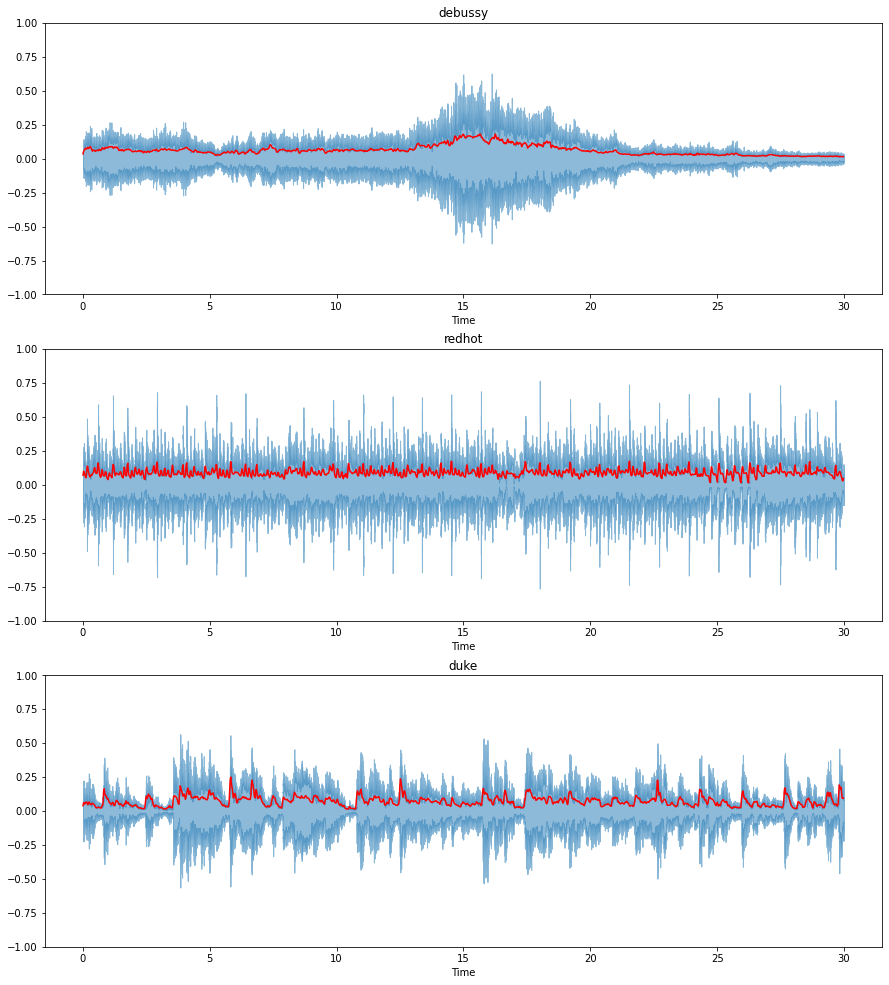

In [13]:
# visualise rms for all the audio files
# visualise the waveforms

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)



plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.title("debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.title("redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.title("duke")
plt.ylim((-1, 1))

plt.show()

In [16]:
def rms(signal, frame_length, hop_length):
    rms = []
    
    for i in range(0, len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2) / frame_length)
        rms.append(rms_current_frame)
        
    return np.array(rms)

In [20]:
rms_debussy_manual = rms(debussy, FRAME_LENGTH, HOP_LENGTH)
rms_redhot_manual = rms(redhot, FRAME_LENGTH, HOP_LENGTH)
rms_duke_manual = rms(duke, FRAME_LENGTH, HOP_LENGTH)

In [18]:
(rms_duke == rms_duke_manual).all()

False

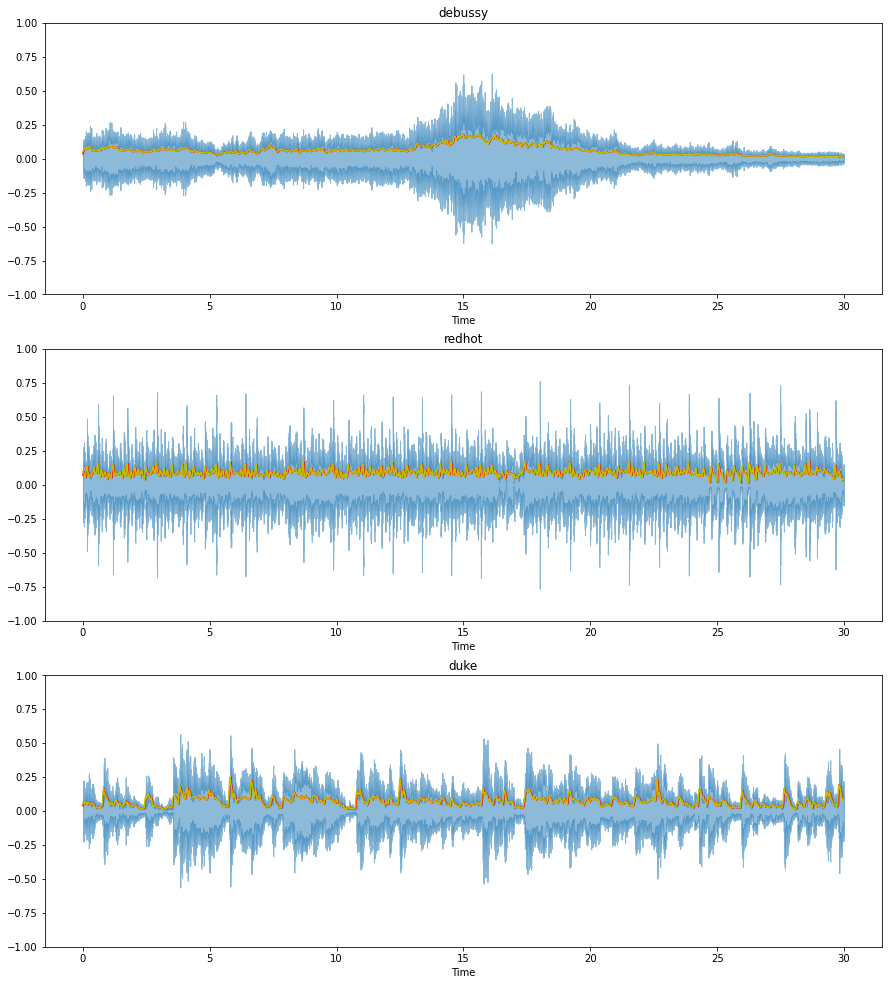

In [21]:
# visualise rms for all the audio files
# visualise the waveforms

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)



plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color="r")
plt.plot(t, rms_debussy_manual, color="y")
plt.title("debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color="r")
plt.plot(t, rms_redhot_manual, color="y")
plt.title("redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color="r")
plt.plot(t, rms_duke_manual, color="y")
plt.title("duke")
plt.ylim((-1, 1))

plt.show()

In [22]:
zcr_debussy = librosa.feature.zero_crossing_rate(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

(0.0, 0.6)

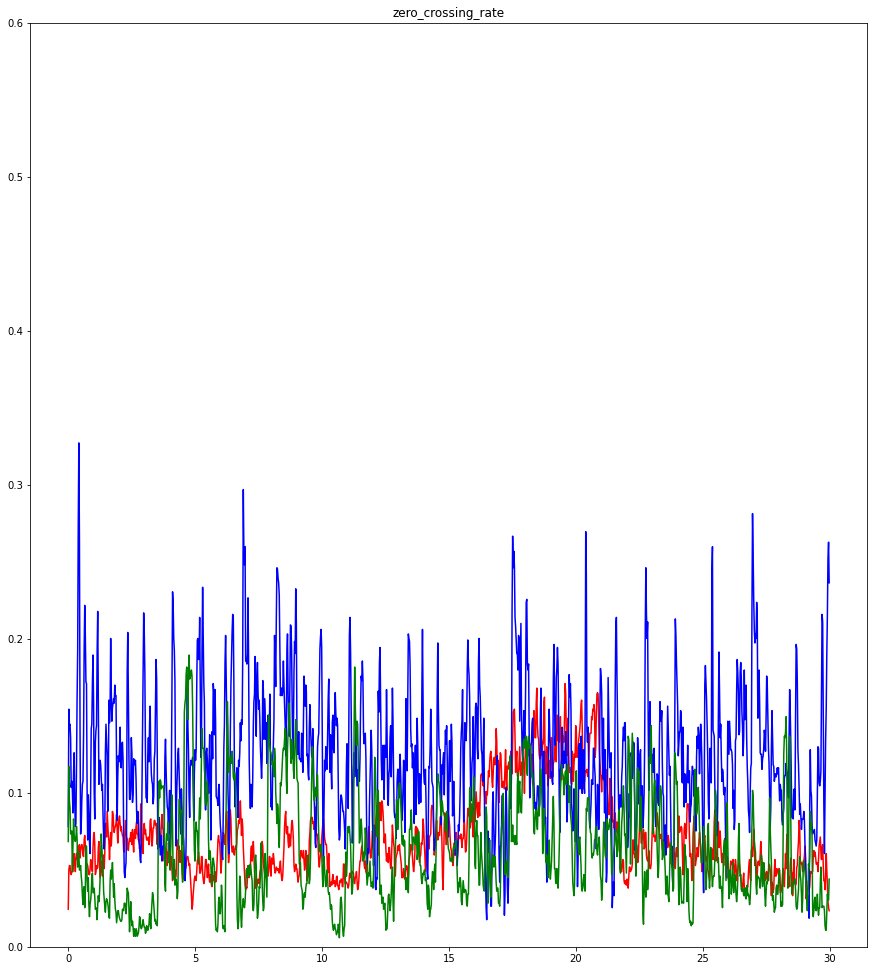

In [33]:
# visualise zcr for all the audio files

plt.figure(figsize=(15, 17))

plt.plot(t, zcr_debussy, color="r")
plt.plot(t, zcr_redhot, color="b")
plt.plot(t, zcr_duke, color="g")
plt.title("zero_crossing_rate")
plt.ylim((0, 0.6))